In [8]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np 
import random

In [10]:
x1_input_2d=np.array([[np.random.randint(100,1000) for _ in range(2)]for _ in range(100)],dtype=np.float32)

In [11]:
x2_input_2d=np.array([[np.random.randint(700,2000) for _ in range(2)]for _ in range(100)],dtype=np.float32)

In [12]:
x3_input_2d=np.array([[np.random.randint(1700,2700) for _ in range(2)]for _ in range(100)],dtype=np.float32)

In [18]:
input_data=np.append(np.append(x1_input_2d,x2_input_2d,axis=0),x3_input_2d,axis=0)

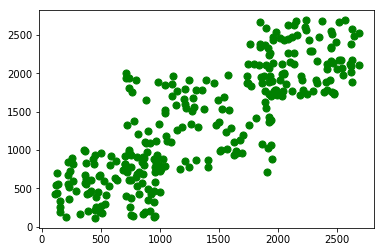

In [19]:
plt.scatter(input_data[:,0],input_data[:,1],s=50,color='green')

In [20]:
def convert_2D(input_d):
    return(tf.convert_to_tensor(input_d,dtype=tf.float32),None)

In [22]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans
from tensorflow.contrib.factorization.python.ops import clustering_ops

In [26]:
kmeans_estimator=kmeans.KMeansClustering(num_clusters=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c29b4c4a8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmp88ukfm_4'}


In [30]:
fit = kmeans_estimator.fit(input_fn=lambda: convert_2D(input_data), steps=1000)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmp88ukfm_4/model.ckpt.
INFO:tensorflow:loss = 191421440.0, step = 1
INFO:tensorflow:global_step/sec: 966.659
INFO:tensorflow:loss = 53781050.0, step = 101 (0.104 sec)
INFO:tensorflow:global_step/sec: 1681.75
INFO:tensorflow:loss = 53664372.0, step = 201 (0.059 sec)
INFO:tensorflow:global_step/sec: 1662.28
INFO:tensorflow:loss = 53642572.0, step = 301 (0.060 sec)
INFO:tensorflow:global_step/sec: 1689.79
INFO:tensorflow:loss = 53634816.0, step = 401 (0.059 sec)
INFO:tensorflow:global_step/sec: 1677.35
INFO:tensorflow:loss = 53631270.0, step = 501 (0.059 sec)
INFO:tensorflow:global_step/sec: 1707.7
INFO:tensorflow:loss = 53629350.0, step = 601 (0.059 sec)
INFO:tensorflow:global_step/sec: 1689.74
INFO:tensorflow:loss = 53628180.0, step = 701 (0.059 sec)
INFO:tensorflow:global_step

In [32]:
clusters=kmeans_estimator.clusters()
clusters

array([[1318.2032, 1382.9832],
       [2171.3792, 2130.1147],
       [ 616.0618,  590.8026]], dtype=float32)

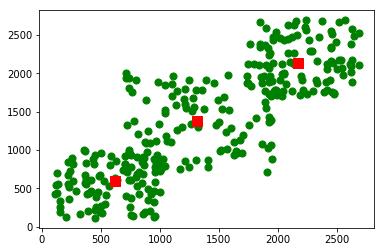

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(input_data[:,0], input_data[:,1], s=50, marker='o', color="green")
ax1.scatter(clusters[:,0], clusters[:,1], c='r', s=100, marker='s')

plt.show()

In [65]:
pred_data=np.array([[1700,1700]],dtype=np.float32)

In [66]:
predict_d = kmeans_estimator.predict(input_fn=lambda: convert_2D(pred_data), as_iterable=False)

INFO:tensorflow:Restoring parameters from /var/folders/6x/yc_cph6n1g7_j3sqvv0tgrx40000gn/T/tmp88ukfm_4/model.ckpt-1000


In [67]:
predict_d

{'all_scores': array([[ 848641.   , 4210184.5  ,   18969.625]], dtype=float32),
 'cluster_idx': 2}